# Import Library

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [100]:
data = pd.read_csv('hyundi.csv')

In [101]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [103]:
# # Rename columns
data = data.rename(columns={'tax(£)': 'tax'})

# Data Cleaning

<Axes: >

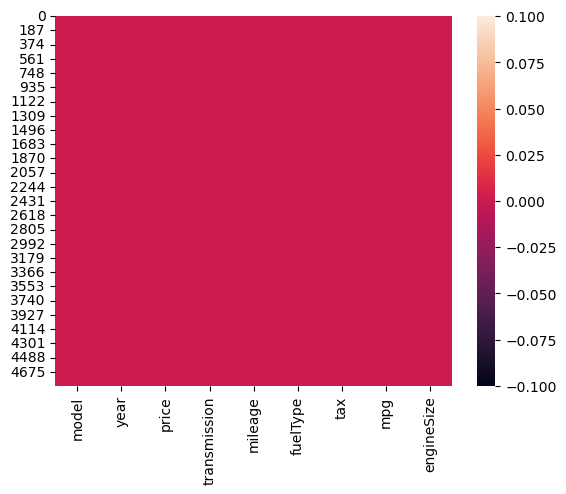

In [104]:
#  Check missing values
sns.heatmap(data.isnull())

In [105]:
# Check data duplikat
data.duplicated().sum()

86

In [106]:
# Hapus data duplikat
data.drop_duplicates(inplace=True)

In [107]:
# Cek kembali data duplikat
data.duplicated().sum()

0

In [108]:
# Fungsi untuk handle outlier
def cap_outliers_iqr(data, columns):
    data_capped = data.copy()
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        print(f"\n📊 Kolom: {col}")
        print(f"  - Q1: {Q1}, Q3: {Q3}")
        print(f"  - Batas bawah: {lower}")
        print(f"  - Batas atas: {upper}")
        print(f"  - Outlier di bawah: {(data[col] < lower).sum()}")
        print(f"  - Outlier di atas: {(data[col] > upper).sum()}")

        # Capping: Ganti nilai outlier dengan batas bawah/atas
        data_capped[col] = np.where(data[col] < lower, lower,
                                np.where(data[col] > upper, upper, data[col]))
    return data_capped


In [109]:
# Cek outlier
columns_to_check = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
data_capped = cap_outliers_iqr(data, columns_to_check)



📊 Kolom: year
  - Q1: 2016.0, Q3: 2018.0
  - Batas bawah: 2013.0
  - Batas atas: 2021.0
  - Outlier di bawah: 96
  - Outlier di atas: 0

📊 Kolom: price
  - Q1: 8000.0, Q3: 15695.0
  - Batas bawah: -3542.5
  - Batas atas: 27237.5
  - Outlier di bawah: 0
  - Outlier di atas: 118

📊 Kolom: mileage
  - Q1: 8542.5, Q3: 31067.5
  - Batas bawah: -25245.0
  - Batas atas: 64855.0
  - Outlier di bawah: 0
  - Outlier di atas: 121

📊 Kolom: tax
  - Q1: 125.0, Q3: 145.0
  - Batas bawah: 95.0
  - Batas atas: 175.0
  - Outlier di bawah: 1099
  - Outlier di atas: 252

📊 Kolom: mpg
  - Q1: 44.8, Q3: 60.1
  - Batas bawah: 21.84999999999999
  - Batas atas: 83.05000000000001
  - Outlier di bawah: 4
  - Outlier di atas: 3

📊 Kolom: engineSize
  - Q1: 1.2, Q3: 1.7
  - Batas bawah: 0.44999999999999996
  - Batas atas: 2.45
  - Outlier di bawah: 47
  - Outlier di atas: 116


In [110]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000
mean,2017.092166,12727.809384,21658.914537,121.187683,53.837956,1.460285
std,1.921323,5976.925227,17618.489657,58.135472,12.740499,0.401858
min,2000.000000,1200.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.000000,8542.500000,125.000000,44.800000,1.200000
50%,2017.000000,11992.500000,17627.000000,145.000000,55.400000,1.600000
75%,2018.000000,15695.000000,31067.500000,145.000000,60.100000,1.700000
max,2020.000000,92000.000000,138000.000000,555.000000,256.800000,2.900000


# Visualisasi Data

In [111]:
# Seleksi hanya kolom numerik
numeric_data = data.select_dtypes(include=["number"])

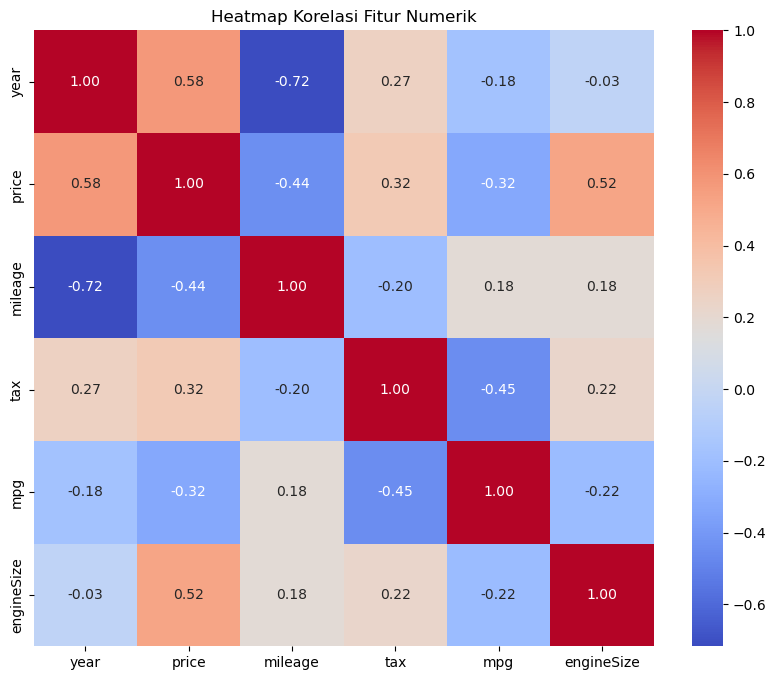

In [112]:
# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Jumlah mobil berdasarkan model

In [113]:
models = data.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax' : 'numberOfCars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ' Accent'),
  Text(1, 0, ' Amica'),
  Text(2, 0, ' Terracan'),
  Text(3, 0, ' Veloster'),
  Text(4, 0, ' Getz'),
  Text(5, 0, ' I800'),
  Text(6, 0, ' IX35'),
  Text(7, 0, ' I40'),
  Text(8, 0, ' IX20'),
  Text(9, 0, ' Santa Fe'),
  Text(10, 0, ' Ioniq'),
  Text(11, 0, ' Kona'),
  Text(12, 0, ' I20'),
  Text(13, 0, ' I30'),
  Text(14, 0, ' I10'),
  Text(15, 0, ' Tucson')])

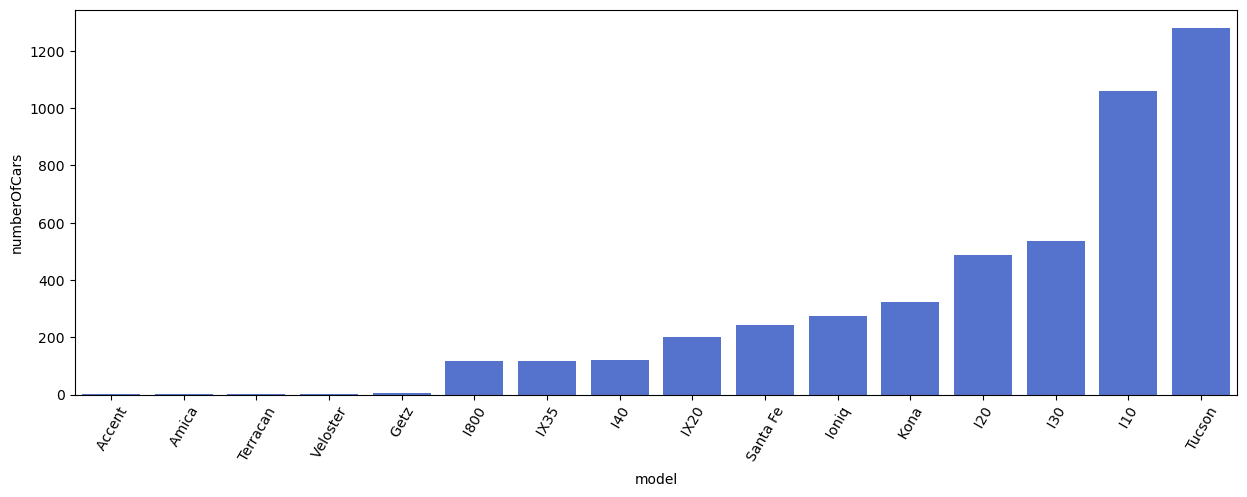

In [114]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

## Ukuran mesin

In [115]:
engine = data.groupby('engineSize').count()[['tax']].sort_values(by = 'tax').reset_index()
engine = engine.rename(columns={'tax' : 'count'})

<Axes: xlabel='engineSize', ylabel='count'>

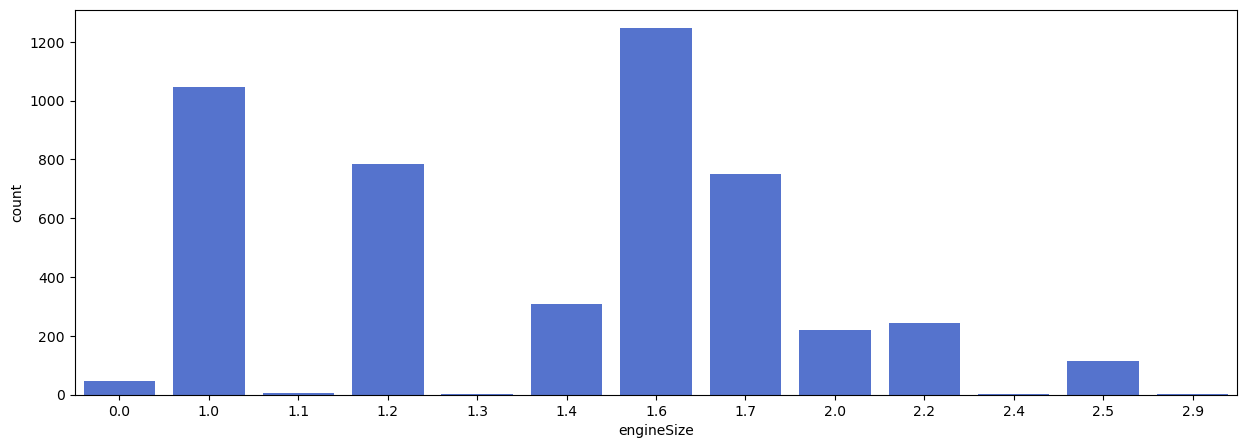

In [116]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color = 'royalblue')

## Distribusi Mileage

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23520\1600450599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

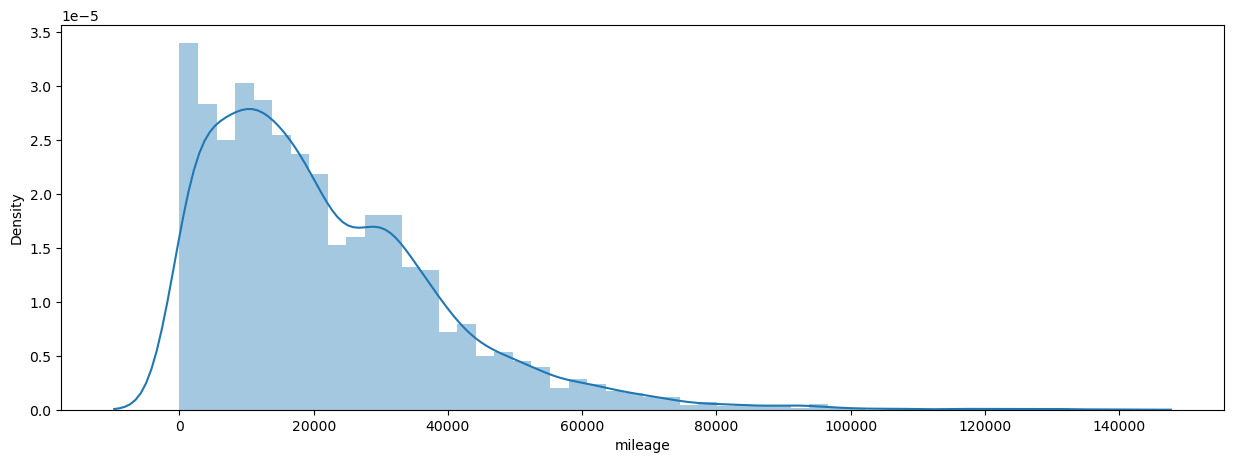

In [117]:
plt.figure(figsize=(15,5))
sns.distplot(data['mileage'])

## Distribusi Harga

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23520\3996487726.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

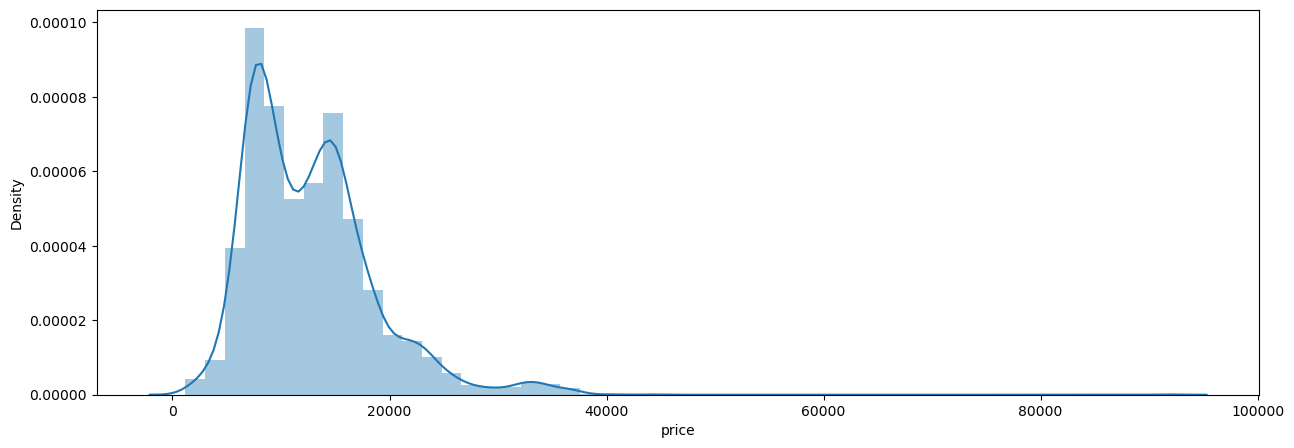

In [118]:
plt.figure(figsize=(15,5))
sns.distplot(data['price'])

# Fitur Selection

In [119]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data[features]
y = data['price']
X.shape, y.shape

((4774, 5), (4774,))

# Split data training & testing

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
y_test.shape

(1433,)

# Model Regresi Linier

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [127]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.6859427461188501


# Input model regresi

In [128]:
# Year = 2017, mileage = 5000, tax = 145, mpg = 30.2, engineSize = 2
input_data = np.array([[2017, 5000, 145, 30.2, 2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [19636.11656511]


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Simpan model

In [129]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))